4) For the real instances, WELL-01.csv and WELL-02.csv, compute for each variable (P-PDG, P-TPT, T-TPT) of each class (0 and 2) the Binary Pattern (BP). For this, for each instance, you will split the multivariate time series into two parts: the data labeled as class 0 and the data labeled as class 2. 
After, compute for each variable of each class the BP with n = 5 (each histogram will have 16 bins). Show the normalized histogram of each variable of each class of each instance (for each instance will have 3 histograms for each class (a total of 12 histograms). Use the subplot function to become the visualization easier. Analyze the obtained histograms and check if it is possible to distinguish the classes by the histograms and if the behavior of the classes is consistent in the two instances. Comment on your observations.

In [109]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Definição das colunas de interesse
columns = ['Timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'class']

well_1 = pd.read_csv(r'C:\Users\USER\Desktop\GitHub\Universidade-time-series\Dataset\WELL-01.csv', delimiter=',', usecols=columns)
well_2 = pd.read_csv(r'C:\Users\USER\Desktop\GitHub\Universidade-time-series\Dataset\WELL-02.csv', delimiter=',', usecols=columns)

well_c0 = [well_1[well_1['class']==0], well_2[well_2['class']==0]]
well_c2 = [well_1[well_1['class']==2], well_2[well_2['class']==2]]

for i, (c0, c2) in enumerate(zip(well_c0, well_c2), start=1):
    print(f"Well-0{i} > Class 0: {c0.shape}, Class 2: {c2.shape}")

def bin_pattern(bloco, array):
    """
    Calcula o padrão binário de um array com base em um bloco de tamanho n.
    
    Parâmetros:
    - bloco (int): Tamanho do bloco (deve ser um inteiro ímpar maior que 1).
    - series (array-like): Série de valores numéricos.

    Retorno:
    - np.array: Array de padrões binários.
    
    Lança:
    - ValueError: Se `n` não for um número ímpar maior que 1.
    """
    if not isinstance(bloco, int) or bloco <= 1 or bloco % 2 == 0:
        raise ValueError("O tamanho do bloco deve ser um inteiro ímpar maior que 1.")
    
    array = np.asarray(array)  # Garante que seja um array NumPy
    gap =bloco // 2  # Define a quantidade de deslocamento baseado no tamanho do bloco
    pattern_list = np.zeros(len(array) - (2 * gap), dtype=int)
    vizinhos = list(range(1, gap + 1)) + list(range(-gap, 0))

    for i in range(gap, len(array) - gap):
        pattern = 0
        for bit,vizinho in enumerate(vizinhos):  # Atribui pesos binários
            if array[i + vizinho] >= array[i]:
                pattern += 2 ** bit
        pattern_list[i - gap] = pattern  # Salva o padrão na posição correspondente

    return pattern_list

Well-01 > Class 0: (3674, 5), Class 2: (1926, 5)
Well-02 > Class 0: (3594, 5), Class 2: (1906, 5)


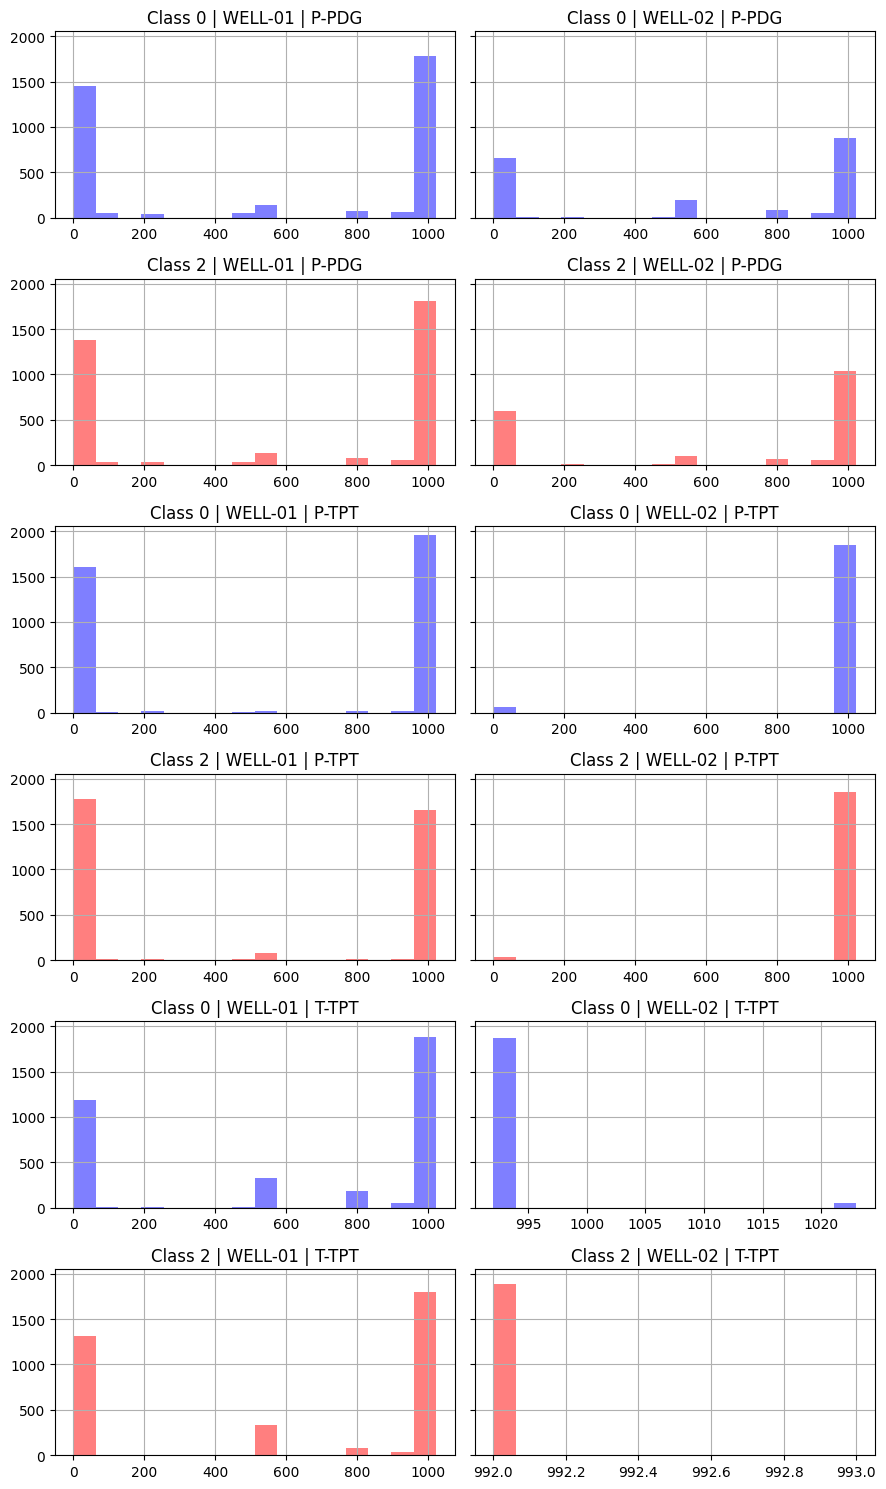

In [114]:
arquivo = ['WELL-01', 'WELL-02']
variables = ['P-PDG', 'P-TPT', 'T-TPT']
BP_list = []

for variable in variables:
    for file in range(2):
        for df_list in [well_c0, well_c2]:  
            BP_list.append(bin_pattern(11, df_list[file][variable]))

fig, axs = plt.subplots(6, 2, figsize=(9, 15), sharey=True)
color = ['blue', 'red']
for j in range(6):
    for i in range(2):
        axs[j, i].hist(BP_list[(2*j)+i], bins=16, color=color[(j%2)], alpha=0.5)
        axs[j, i].set_title(f'Class {(j%2)*2} | {arquivo[i]} | {variables[j//2]}')
        axs[j, i].grid()
plt.tight_layout()
plt.show()
        